<a href="https://colab.research.google.com/github/ganpath21/machine-learning-using-tensorflow/blob/master/Simple_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression

# Data preparation
**generate the dataset**

In [0]:
from sklearn import datasets as skds
X , Y = skds.make_regression(n_samples = 200,
                             n_features = 1,
                             n_informative = 1,
                             n_targets = 1,
                             noise = 20.0)

**reshape y to two dimension**

In [0]:
if (Y.ndim == 1):
    Y = Y.reshape(len(Y), 1)

**plot the dataset**

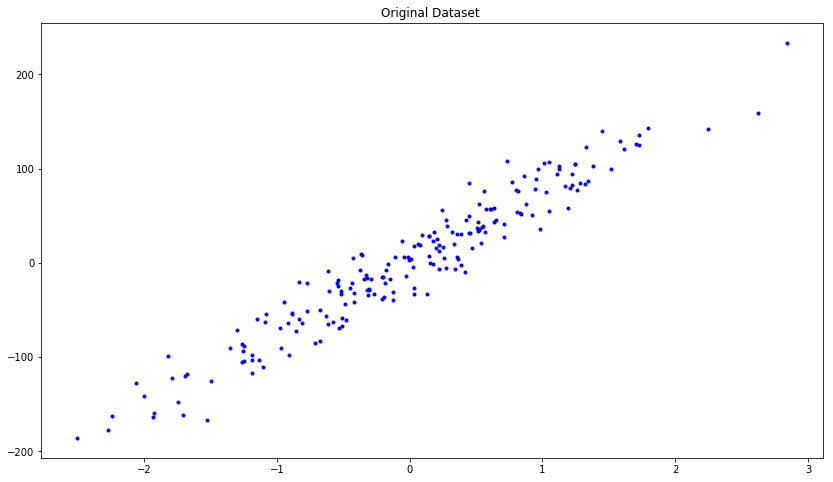

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(X, Y, 'b.')
plt.title('Original Dataset ')
plt.show()

**Divide the data into train and test sets**

In [0]:
import sklearn.model_selection as skms
X_train, X_test, Y_train, Y_test = skms.train_test_split(X, Y, test_size= .4, random_state = 123)

**1. Defining the inputs, parameters, and other variables**

In [0]:
num_outputs = Y_train.shape[1]
num_inputs = X_train.shape[1]

In [0]:
import tensorflow as tf
x_tensor = tf.placeholder(dtype = tf.float32,
                          shape = [None, num_inputs],
                          name = "x")
y_tensor = tf.placeholder(dtype = tf.float32,
                          shape = [None, num_outputs],
                          name = "y")
w = tf.Variable(tf.zeros([num_inputs, num_outputs]),
                dtype= tf.float32,
                name = "w")
b = tf.Variable(tf.zeros([num_outputs]),
                dtype = tf.float32,
                name = "b")

**2. Defining the model**

In [0]:
model = tf.matmul(x_tensor, w) + b

**3. Defining the loss function(mean squared error(MSE))**

In [8]:
# mse and R2 function
loss = mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


**4. Defining the optimizer function**

In [0]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

**5. Training the model**

In [0]:
import numpy as np
num_epochs = 1500
w_hat = 0
b_hat = 0
loss_epochs = np.empty(shape=[num_epochs], dtype=float)
mse_epochs = np.empty(shape=[num_epochs], dtype=float)
rs_epochs = np.empty(shape=[num_epochs], dtype=float)

mse_score = 0
rs_score = 0

In [11]:
# initialize the session and global variables, run the training loop for num_epochs times:
with tf.Session() as tfs:
  tf.global_variables_initializer().run()
  for epoch in range(num_epochs):
    # within each iteration run optimizer on training data
    tfs.run(optimizer, feed_dict = {x_tensor: X_train, y_tensor: Y_train})
    # using the learned w and b values, calculate the error and save it in loss_val to plot it later:
    loss_val = tfs.run(loss, feed_dict={x_tensor: X_train, y_tensor: Y_train})
    loss_epochs[epoch] = loss_val
    # calculate the MSE and R-squared value for the predicted values of the test data
    mse_score = tfs.run(mse, feed_dict = {x_tensor: X_test, y_tensor: Y_test})
    mse_epochs[epoch] = mse_score

    rs_score = tfs.run(rs, feed_dict = {x_tensor: X_test, y_tensor: Y_test})
    rs_epochs[epoch] = rs_score
  w_hat,b_hat = tfs.run([w,b])
  w_hat = w_hat.reshape(1)
  #print the model
  print('model : Y = {0:.8f} X + {1:.8f}'.format(w_hat[0], b_hat[0]))
  print('For test data: MSE = {0:.8f}, R2 = {1:.8f}'.format(mse_score, rs_score))

model : Y = 69.77906036 X + -1.97524548
For test data: MSE = 496.47192383, R2 = 0.90240586


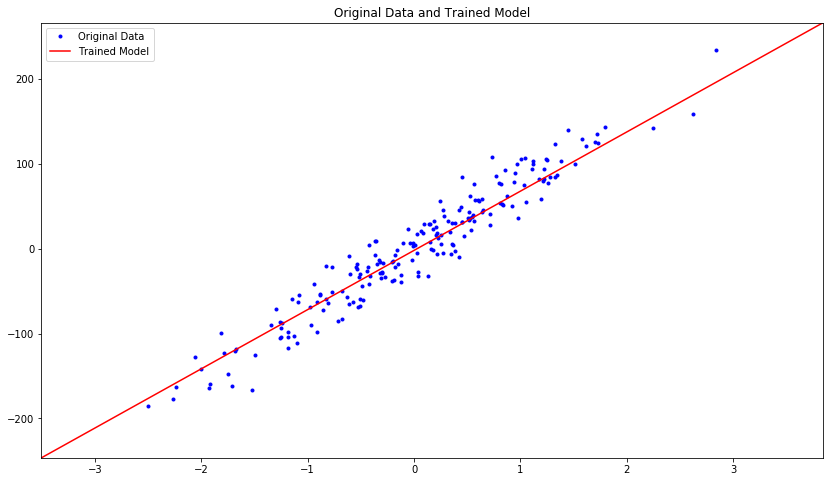

In [12]:
# plot the estimated model along with the original data:
plt.figure(figsize=(14,8))
plt.title('Original Data and Trained Model')
x_plot = [np.min(X)-1,np.max(X)+1]
y_plot = w_hat * x_plot + b_hat
plt.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plt.plot(X,Y,'b.', label='Original Data')
plt.plot(x_plot, y_plot, 'r-', label = 'Trained Model')
plt.legend()
plt.show()

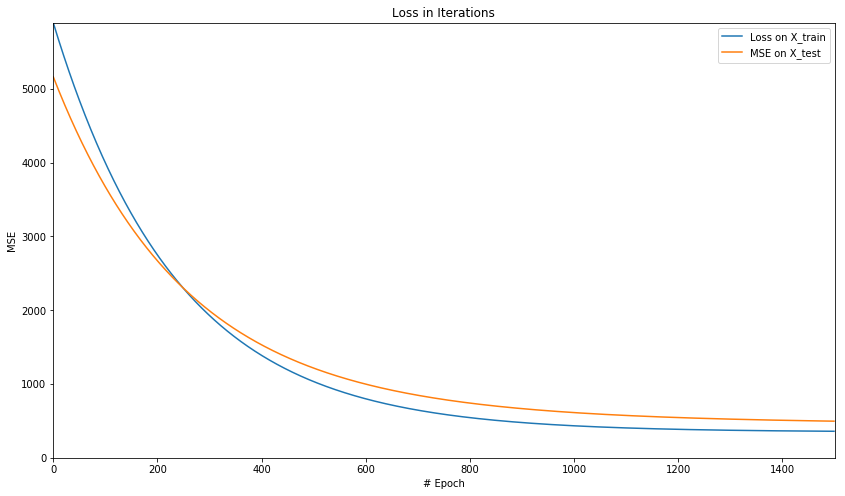

In [13]:
# plot the mean squared error for training and test data
plt.figure(figsize=(14,8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

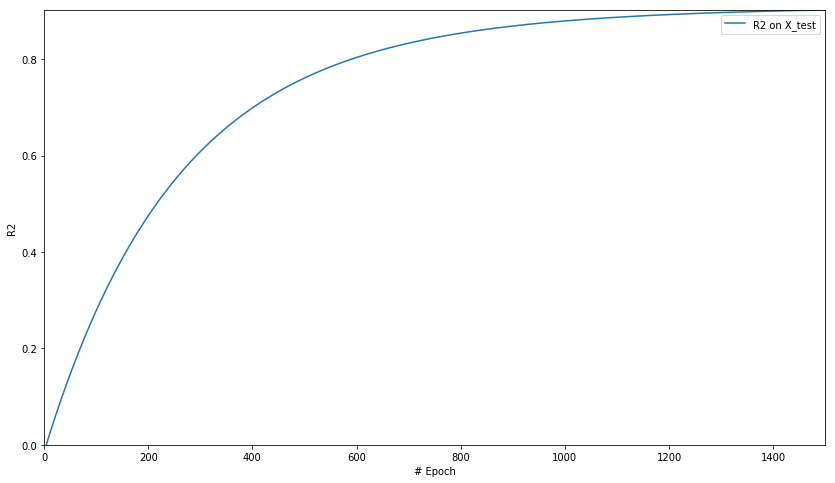

In [14]:
# plot the value of r-squared
plt.figure(figsize=(14,8))
plt.axis([0,num_epochs,0,np.max(rs_epochs)])
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()